# Confusion Matrix

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
dataset = pd.read_csv("placement-dataset.csv")
dataset.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [16]:
dataset = dataset.drop(columns=["city"])
dataset.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [17]:
dataset.isnull().sum()

cgpa         8
iq           4
placement    0
dtype: int64

In [20]:
dataset = dataset.fillna(dataset.mean())

In [21]:
dataset.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [22]:
# seperatig input and output:
x_input = dataset.iloc[:,:-1]
y_output = dataset["placement"]

In [41]:
#splitting the train and test data:
x_train,x_test,y_train,y_test = train_test_split(x_input,y_output,test_size=0.2,random_state=46)

In [42]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
#lets check accuracy of trained model:
lr.score(x_test,y_test)*100

90.0

In [46]:
# lets see the confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [48]:
cf = confusion_matrix(y_test,lr.predict(x_test))
cf

array([[ 8,  1],
       [ 1, 10]])

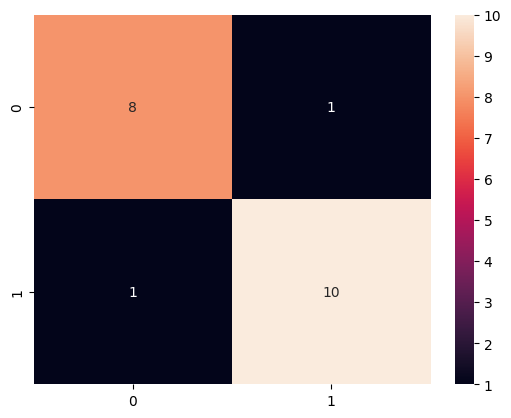

In [49]:
sns.heatmap(cf,annot=True)
plt.show()

# Precision:

In [50]:
ps = precision_score(y_test,lr.predict(x_test))*100
ps

np.float64(90.9090909090909)

In [51]:
# hence the model is 90% precise

# Recall

In [52]:
rc = recall_score(y_test,lr.predict(x_test))*100
rc

np.float64(90.9090909090909)

# F1 Score

In [53]:
f1 = f1_score(y_test,lr.predict(x_test))*100
f1

np.float64(90.9090909090909)